In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Retrieve data

In [2]:
df = pd.read_excel("data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4943 non-null   datetime64[ns]
 1   metered_price          4923 non-null   float64       
 2   upfront_price          3409 non-null   float64       
 3   distance               4943 non-null   int64         
 4   duration               4943 non-null   int64         
 5   gps_accuracy           4943 non-null   int64         
 6   entered_by             4943 non-null   object        
 7   ride_state             4943 non-null   object        
 8   dest_change_number     4943 non-null   int64         
 9   prediction_price_type  4923 non-null   object        
 10  predicted_distance     4923 non-null   float64       
 11  predicted_duration     4923 non-null   float64       
 12  change_reason_pricing  298 non-null    object        
 13  rid

In [3]:
df.head()

,Date,metered_price,upfront_price,distance,duration,gps_accuracy,entered_by,ride_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,rider_app_version,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,2020-02-02 03:37:30.573,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,CI.4.17,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,2020-02-08 02:26:18.924,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,CA.5.43,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,2020-02-08 11:50:35.423,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,CA.5.43,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,2020-02-05 06:34:53.782,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,CA.5.23,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,2020-02-13 17:31:23.996,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,CA.5.04,DA.4.37,433,Itel W5504,0,0,NaN


# Descriptive Analysis

In [5]:
# data descriptive
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,4943,2020-02-22 02:56:41.563682304,2020-02-02 00:01:15.590000,2020-02-11 22:00:39.114999808,2020-02-21 20:34:37.132999936,2020-03-03 06:39:14.624500224,2020-03-13 23:52:07.108000,NaN
metered_price,4923.0,7998.471296,2.0,5.38,13.35,10991.67,194483.52,15815.850352
upfront_price,3409.0,4160.095747,2.0,4.2,6.6,4000.0,595000.0,17015.711912
distance,4943.0,9769.223144,0.0,3785.5,7140.0,11953.0,233190.0,10912.426401
duration,4943.0,1566.230629,0.0,604.0,1054.0,1929.5,22402.0,1650.329858
gps_accuracy,4943.0,0.800728,0.0,1.0,1.0,1.0,1.0,0.399493
dest_change_number,4943.0,1.119361,1.0,1.0,1.0,1.0,12.0,0.499611
predicted_distance,4923.0,8822.636807,0.0,4130.5,6918.0,10674.0,353538.0,10548.801733
predicted_duration,4923.0,1106.737355,0.0,597.5,939.0,1427.0,20992.0,806.098535
driver_device_uid_new,4943.0,1093.311349,0.0,561.5,1088.0,1643.0,2158.0,626.408069


# Time Series Analysis

In [7]:
# Extract date from the timestamp and create a new column 'DateOnly'
df['DateOnly'] = df['Date'].dt.date

# Count the number of rows for each date
date_counts = df['DateOnly'].value_counts().sort_index()

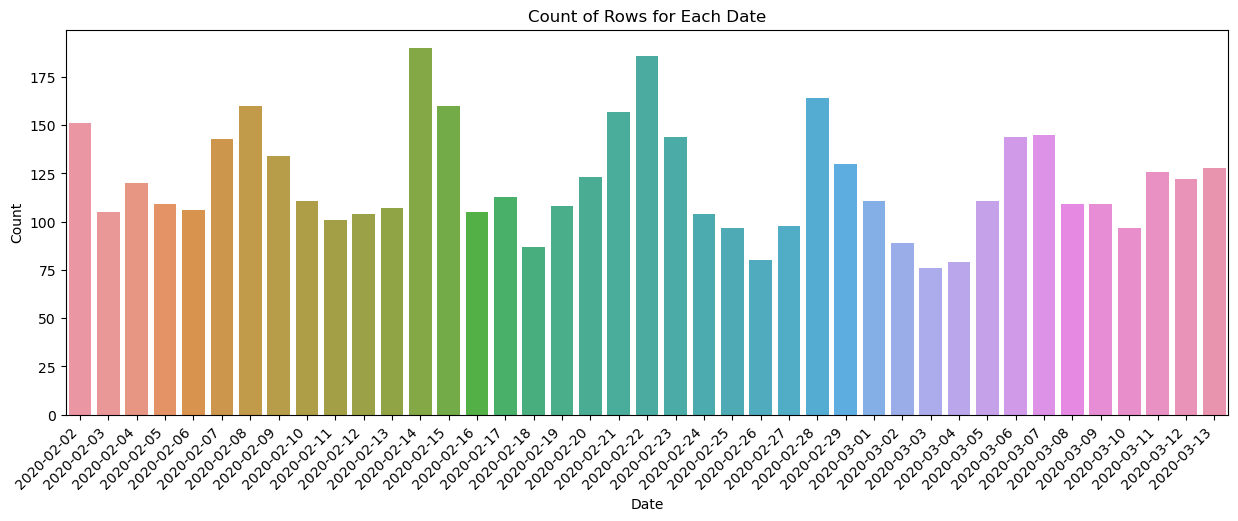

In [8]:
# Plot the count of rows for each date
plt.figure(figsize=(15, 5))
sns.barplot(x=date_counts.index, y=date_counts.values)
plt.title('Count of Rows for Each Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

## Time series analysis by days

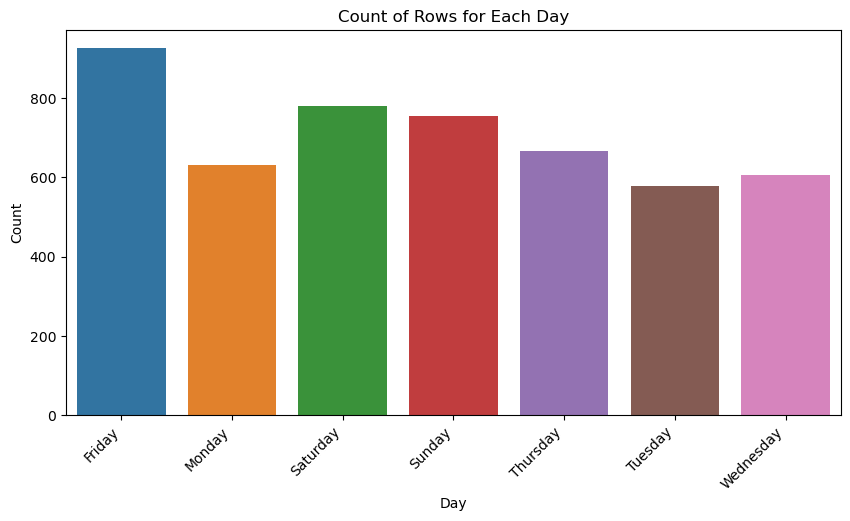

In [11]:
# Extract day name from the timestamp and create a new column 'Day'
df['Day'] = df['Date'].dt.day_name()

# Count the number of rows for each day
day_counts = df['Day'].value_counts().sort_index()

# Plot the count of rows for each day
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Count of Rows for Each Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

## Time series analysis by hours

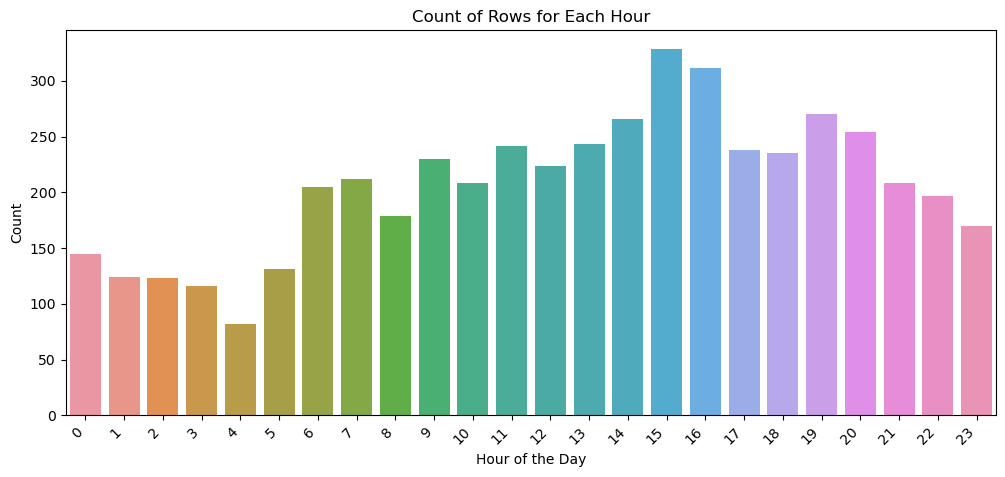

In [13]:
# Extract hour from the timestamp and create a new column 'Hour'
df['Hour'] = df['Date'].dt.hour

# Count the number of rows for each hour
hour_counts = df['Hour'].value_counts().sort_index()

# Plot the count of rows for each hour
plt.figure(figsize=(12, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Count of Rows for Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

## Calculate total income on the date

In [15]:
date_column = 'Date'
income_column = 'metered_price'

# Extract date from the timestamp and create a new column 'DateOnly'
df['DateOnly'] = df[date_column].dt.date

# Calculate total income for each date
total_income = df.groupby('DateOnly')[income_column].sum().sort_index()

# Count the number of rows for each date
date_counts = df['DateOnly'].value_counts().sort_index()

# Convert the index to datetime
date_counts.index = pd.to_datetime(date_counts.index)

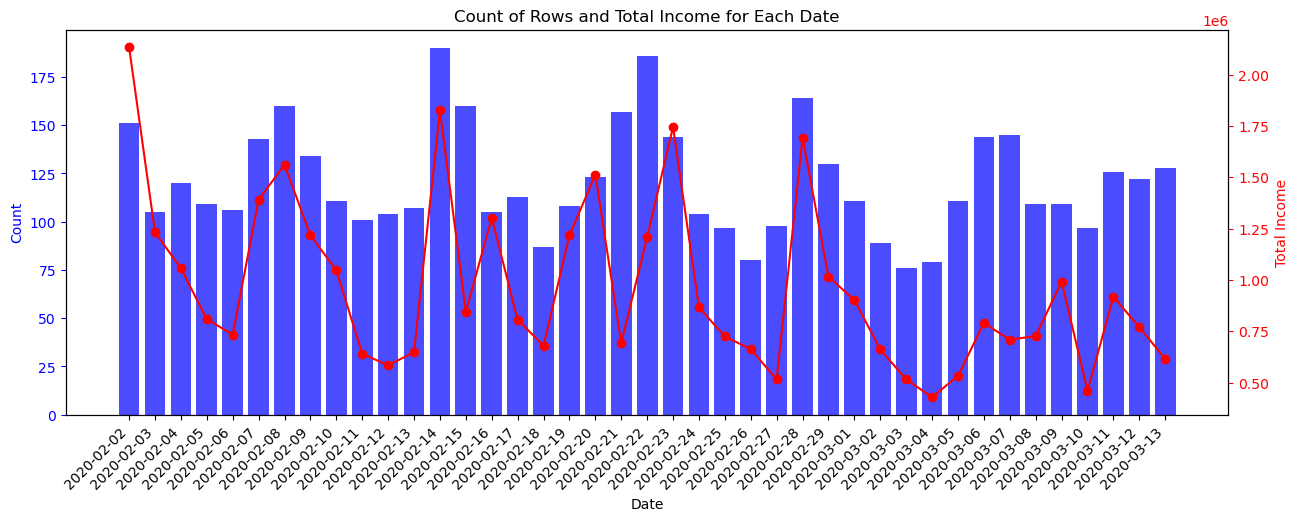

In [16]:
# Plot the count of rows and total income for each date
fig, ax1 = plt.subplots(figsize=(15, 5))

# Bar plot for the count of rows
ax1.bar(date_counts.index, date_counts.values, color='b', alpha=0.7, label='Count of Rows')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(date_counts.index)
ax1.set_xticklabels(date_counts.index.strftime('%Y-%m-%d'), rotation=45, ha='right')  # Format date for better readability

# Create a second y-axis to show total income
ax2 = ax1.twinx()
ax2.plot(total_income.index, total_income.values, color='r', label='Total Income', marker='o')
ax2.set_ylabel('Total Income', color='r')
ax2.tick_params('y', colors='r')

plt.title('Count of Rows and Total Income for Each Date')
plt.show()